**Indian State-Level Elections Dataset**

In the diverse and vibrant democracy of India, elections are the cornerstone of its political landscape. The Indian State-Level Elections dataset offers a comprehensive and detailed perspective on the electoral process, providing valuable insights into the candidates and political parties that have shaped the nation. This dataset encompasses candidate-level data for elections to the lower houses of India's national and state legislatures, namely the Lok Sabha and Vidhan Sabhas. Spanning the years from 1977 to 2015, each row within this dataset represents a candidate who ventured into the democratic arena during a specific state and year.

Key Variables in the State Election Data File:

1. **State (st_name):** This variable describes the state where the election took place, providing a crucial geographical context.

2. **Assembly Election Year (Year):** A floating-point variable indicating the year in which the assembly election occurred, allowing for temporal analysis and trend observation.

3. **Assembly Constituency Number (ac_no):** An integer variable signifying the unique number of the assembly constituency, enabling precise identification.

4. **Assembly Constituency Name (ac_name):** A character string of up to 28 characters, containing the name of the assembly constituency in question.

5. **Assembly Constituency Reservation Status (ac_type):** A character string with a maximum length of 5 characters, denoting the reservation status of the assembly constituency, a critical factor in Indian electoral politics.

6. **Candidate Name (cand_name):** A character string with a maximum length of 98 characters, providing the name of the candidate who participated in the election.

7. **Candidate Sex (cand_sex):** A single-character string representing the gender of the candidate, shedding light on gender dynamics in Indian politics.

8. **Party Name (partyname):** A character string with a maximum length of 60 characters, showcasing the name of the political party to which the candidate was affiliated.

9. **Party Abbreviation (partyabbre):** A character string limited to 11 characters, offering an abbreviation for the political party, making it easier to analyze and categorize party affiliations.

10. **Votes Received (totvotpoll):** A long integer variable denoting the total number of votes received by the candidate, a crucial metric for assessing electoral success.

11. **Number of Registered Voters (electors):** Another long integer variable, indicating the total number of registered voters in the assembly constituency, which is fundamental in understanding voter turnout and participation.

The Indian State-Level Elections dataset is a treasure trove of information, illuminating the electoral history of one of the world's largest democracies. Researchers, analysts, and enthusiasts can use this data to explore the intricacies of Indian politics, track trends over the years, and delve into the diverse landscape of state-level elections. It is an invaluable resource for understanding the democratic journey of India from 1977 to 2015.

**Import the necessary Libraries**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Importing the csv datafile**

In [5]:
from google.colab import files
upload=files.upload()

Saving indian-state-level-election.csv to indian-state-level-election.csv


**Reading the csv file**

In [6]:
data = pd.read_csv('indian-state-level-election.csv')

**Preview of the datafile by displaying the first few rows of the dataset**

In [7]:
print(data.head())

          st_name    year  ac_no    ac_name ac_type  \
0  Andhra Pradesh  1978.0      1  Ichapuram     GEN   
1  Andhra Pradesh  1978.0      1  Ichapuram     GEN   
2  Andhra Pradesh  1978.0      1  Ichapuram     GEN   
3  Andhra Pradesh  1978.0      1  Ichapuram     GEN   
4  Andhra Pradesh  1978.0      1  Ichapuram     GEN   

                   cand_name cand_sex                     partyname  \
0           Manabala Ramarao        M                   Independent   
1                Appadu Sahu        M                   Independent   
2           Uppada Rangababu        M      Indian National Congress   
3       Kalla Balarama Swamy        M  Indian National Congress (I)   
4  Bendalam Venkatesam Sarma        M                  Janata Party   

  partyabbre  totvotpoll  electors  
0        IND       813.0     83247  
1        IND      1743.0     83247  
2        INC      4427.0     83247  
3     INC(I)     19805.0     83247  
4        JNP     34251.0     83247  


**Checking data types and non-null counts**

In [8]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327294 entries, 0 to 327293
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   st_name     327294 non-null  object 
 1   year        327294 non-null  float64
 2   ac_no       327294 non-null  int64  
 3   ac_name     311211 non-null  object 
 4   ac_type     327294 non-null  object 
 5   cand_name   327294 non-null  object 
 6   cand_sex    321992 non-null  object 
 7   partyname   327294 non-null  object 
 8   partyabbre  324588 non-null  object 
 9   totvotpoll  327287 non-null  float64
 10  electors    327294 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 27.5+ MB
None


**Summary statistics**

In [9]:
print(data.describe())

                year          ac_no     totvotpoll      electors
count  327294.000000  327294.000000  327287.000000  3.272940e+05
mean     1996.143765     127.910918    9299.673421  1.684289e+05
std        10.993383      96.626260   17025.780928  8.316493e+04
min      1977.000000       1.000000       0.000000  0.000000e+00
25%      1989.000000      49.000000     289.000000  1.186640e+05
50%      1995.000000     106.000000    1022.000000  1.578260e+05
75%      2006.000000     193.000000    9182.000000  2.010310e+05
max      2015.000000     425.000000  584098.000000  1.593907e+06


**Handling the missing values by removing rows with missing values**

In [10]:
data.dropna(inplace=True)

**Verifying that there are no more missing values**

In [11]:
print(data.isnull().sum())

st_name       0
year          0
ac_no         0
ac_name       0
ac_type       0
cand_name     0
cand_sex      0
partyname     0
partyabbre    0
totvotpoll    0
electors      0
dtype: int64


**Voter Turnout by State**

In [12]:
voter_turnout = (data['totvotpoll'] / data['electors']) * 100
data['Voter Turnout'] = voter_turnout
state_voter_turnout = data.groupby('st_name')['Voter Turnout'].mean()
print(state_voter_turnout)

st_name
Andhra Pradesh                          8.045387
Arunachal Pradesh                      23.269011
Assam                                   8.114334
Bihar                                   3.865761
Chhattisgarh                            6.811194
Goa                                    14.759583
Gujarat                                 7.278881
Haryana                                 4.658080
Himachal Pradesh                       12.149714
Jammu & Kashmir                         5.042218
Jharkhand                               3.670018
Karnataka                               7.917738
Kerala                                 12.030725
Madhya Pradesh                          6.034508
Maharashtra                             5.262265
Manipur                                17.098970
Meghalaya                              15.608395
Mizoram                                17.383821
Nagaland                               26.529503
National Capital Territory Of Delhi     5.201404
Odisha      

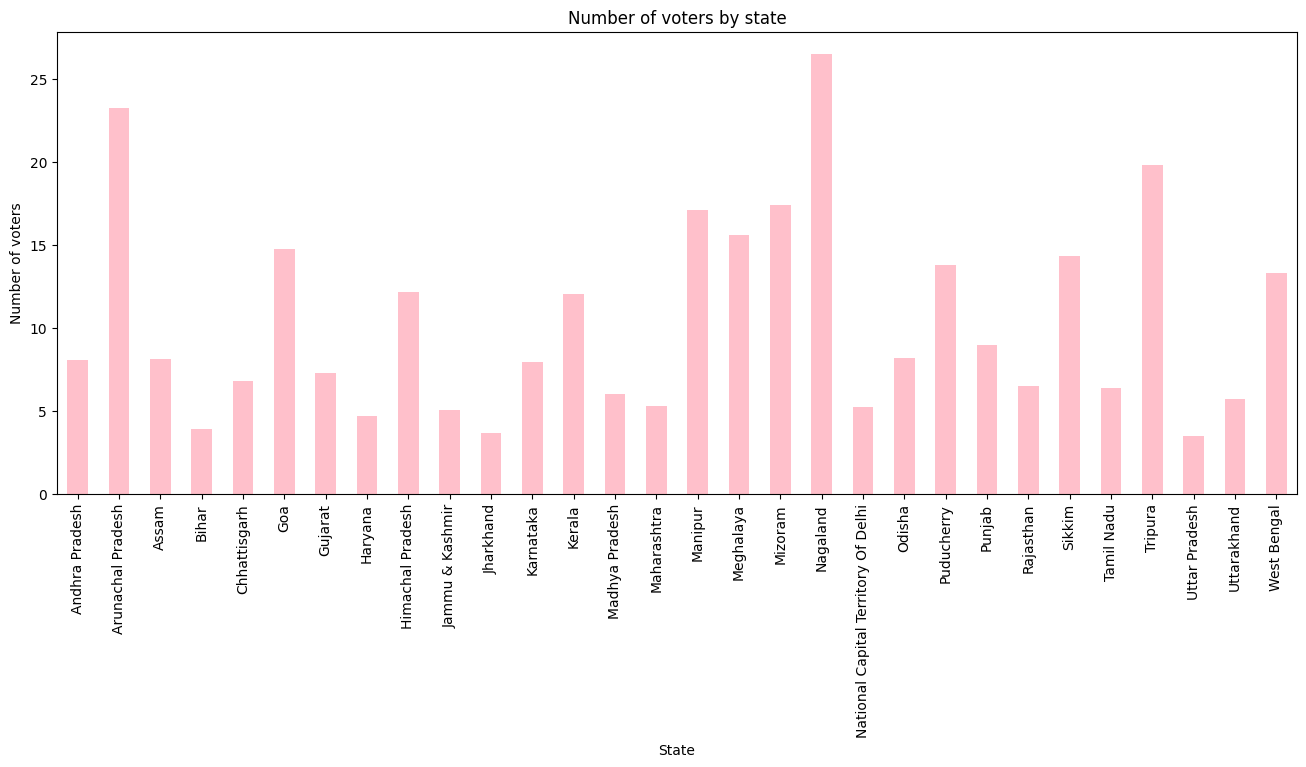

In [13]:
plt.figure(figsize=(16, 6))
state_voter_turnout.plot(kind='bar', color='pink')
plt.title('Number of voters by state')
plt.xlabel('State')
plt.ylabel('Number of voters')
plt.xticks(rotation=90)
plt.show()

**Top-Performing Candidates**

In [14]:
top_candidates = data.nlargest(10, 'totvotpoll')
print(top_candidates[['cand_name', 'totvotpoll']])

                                                cand_name  totvotpoll
83012                                  Narottambhai Patel    584098.0
82302                                           Amit Shah    407659.0
175941                                        Ganesh Naik    324706.0
120444                                            Ashok R    313309.0
81212               Amitbhai Anilchandra Shah (Amit Shah)    288327.0
246559                                     Ranganathan. B    278850.0
246590                                          Raja, S.R    269717.0
246558                                           Kalan. G    248734.0
82426   Dr. Kodnani Maya Surendrakumar (Dr. Maya Kodnani)    237518.0
83011                        Dhanani Janakbhai Govindbhai    237158.0


**Party-wise vote counts**

In [15]:
party_vote_counts = data.groupby('partyname')['totvotpoll'].sum().sort_values(ascending=False).head(10)
party_vote_counts

partyname
Indian National Congress              528642340.0
INC                                   190070263.0
Bharatiya Janata Party                175821078.0
BJP                                   161329679.0
Independent                           134370226.0
Communist Party Of India (Marxist)     98605128.0
Independents                           81333811.0
Bhartiya Janta Party                   79084338.0
Bahujan Samaj Party                    73598636.0
Janata Dal                             66765695.0
Name: totvotpoll, dtype: float64

**Bar plot for party-wise vote counts**

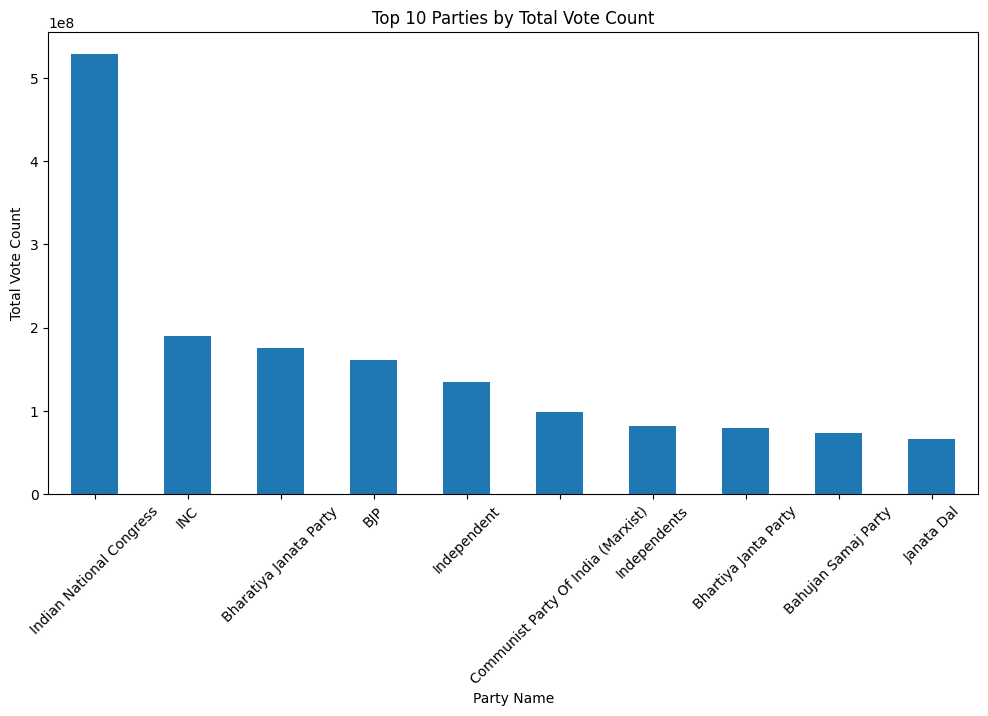

In [16]:
plt.figure(figsize=(12, 6))
party_vote_counts.plot(kind='bar')
plt.title('Top 10 Parties by Total Vote Count')
plt.xlabel('Party Name')
plt.ylabel('Total Vote Count')
plt.xticks(rotation=45)
plt.show()

**Count the number of male and female candidates**

In [17]:
gender_counts = data['cand_sex'].value_counts()
gender_counts

M    289029
F     14156
O        11
Name: cand_sex, dtype: int64

**Pie chart to visualize the gender distribution**

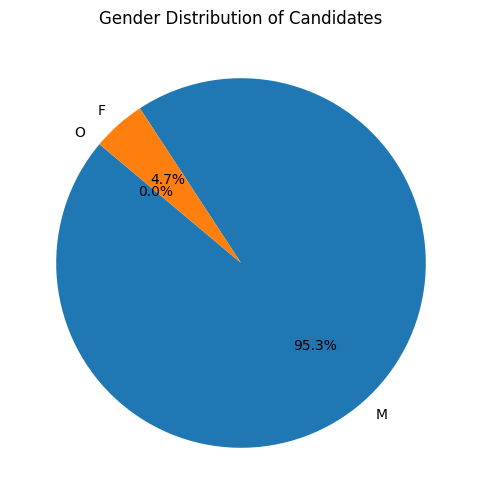

In [18]:
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution of Candidates')
plt.show()

**Group data by year and sum the total vote counts**

In [19]:
yearly_vote_counts = data.groupby('year')['totvotpoll'].sum()
yearly_vote_counts

year
1977.0    118552968.0
1978.0     38143267.0
1979.0       236137.0
1980.0    118590265.0
1982.0     38511243.0
1983.0     38112778.0
1984.0     22097079.0
1985.0    150268693.0
1987.0     45357764.0
1989.0    110468567.0
1990.0     92819942.0
1991.0    121766273.0
1992.0      3005083.0
1993.0     96673023.0
1994.0     52015494.0
1995.0     68852493.0
1996.0    150313247.0
1997.0     10289814.0
1998.0     68657143.0
1999.0     56151574.0
2000.0     58825949.0
2001.0     91042323.0
2002.0     84389926.0
2003.0     65916903.0
2004.0    120315824.0
2005.0     43783304.0
2005.1     23552288.0
2006.0    101190588.0
2007.0     96035434.0
2008.0    100890513.0
2009.0    125745729.0
2011.0    116449068.0
2012.0    127027322.0
2013.0    120514648.0
2014.0    153354084.0
2015.0      8942372.0
Name: totvotpoll, dtype: float64

**Creating a line plot to show trends over time**

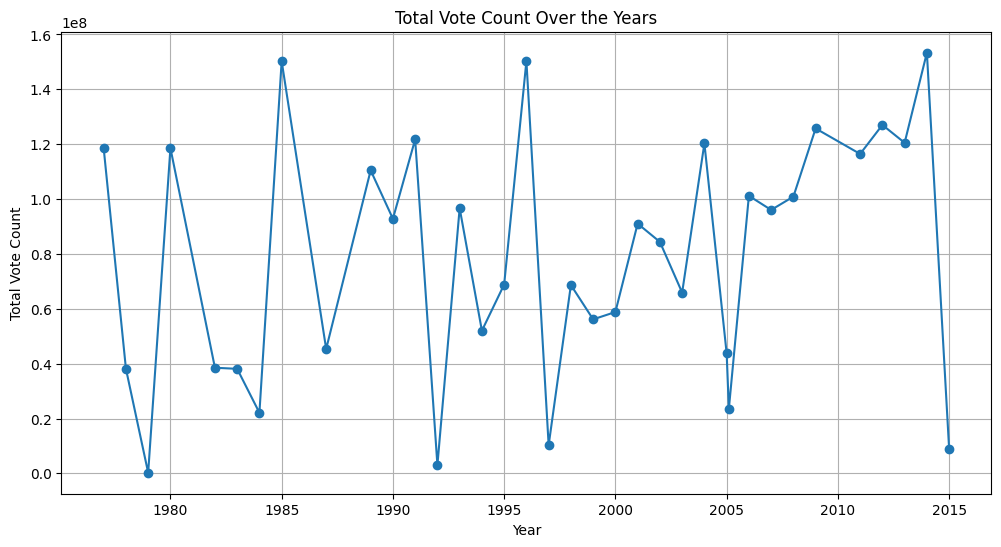

In [20]:
plt.figure(figsize=(12, 6))
yearly_vote_counts.plot(kind='line', marker='o')
plt.title('Total Vote Count Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Vote Count')
plt.grid(True)
plt.show()

**Counting the number of elections per state**

In [21]:
state_election_counts = data['st_name'].value_counts()
state_election_counts

Uttar Pradesh                          60206
Bihar                                  34541
Madhya Pradesh                         24832
Tamil Nadu                             22009
Andhra Pradesh                         21718
Karnataka                              17111
Rajasthan                              16851
West Bengal                            13334
Haryana                                12100
Gujarat                                11604
Maharashtra                            10356
Odisha                                  8844
Assam                                   8321
Kerala                                  7712
Punjab                                  6589
National Capital Territory Of Delhi     5943
Jharkhand                               4017
Himachal Pradesh                        3507
Chhattisgarh                            2871
Jammu & Kashmir                         2185
Mizoram                                 1627
Uttarakhand                             1573
Arunachal 

**Bar plot to visualize the number of elections per state**

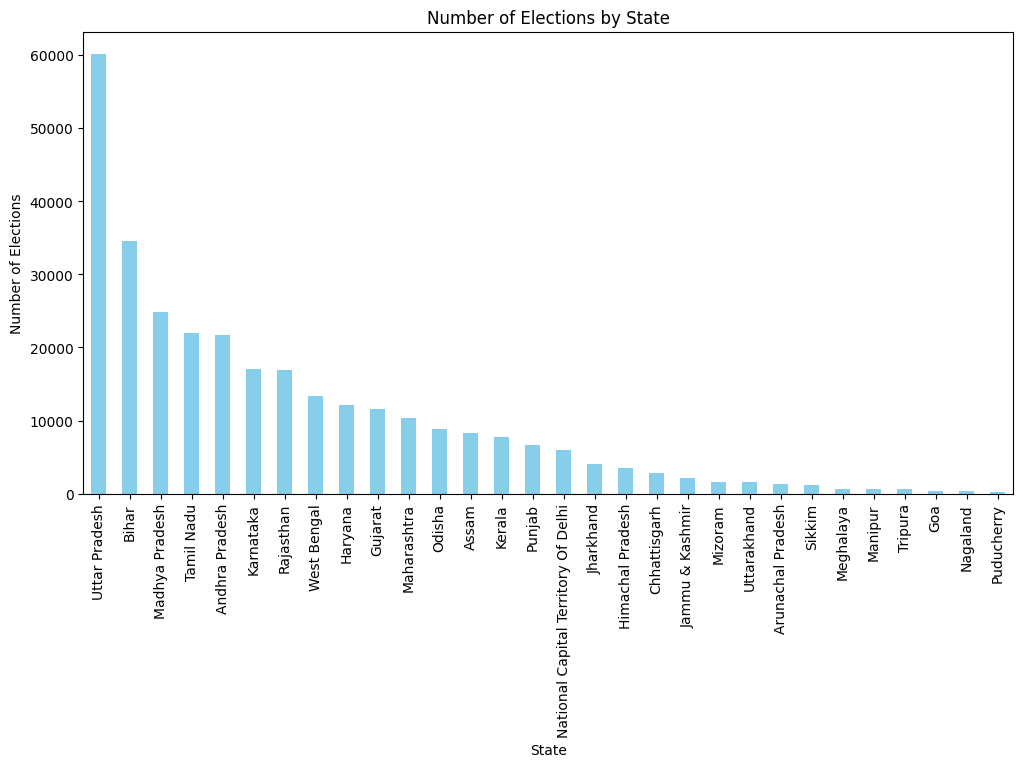

In [22]:
plt.figure(figsize=(12, 6))
state_election_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Elections by State')
plt.xlabel('State')
plt.ylabel('Number of Elections')
plt.xticks(rotation=90)
plt.show()

**Finding top 5 parties**

In [23]:
top_parties = data.groupby('partyname')['totvotpoll'].sum().sort_values(ascending=False).head(5).index
top_parties

Index(['Indian National Congress', 'INC', 'Bharatiya Janata Party', 'BJP',
       'Independent'],
      dtype='object', name='partyname')

In [24]:
top_party_data = data[data['partyname'].isin(top_parties)]
top_party_data

,st_name,year,ac_no,ac_name,ac_type,cand_name,cand_sex,partyname,partyabbre,totvotpoll,electors,Voter Turnout
0,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Manabala Ramarao,M,Independent,IND,813.0,83247,0.976612
1,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Appadu Sahu,M,Independent,IND,1743.0,83247,2.093769
2,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Uppada Rangababu,M,Indian National Congress,INC,4427.0,83247,5.317909
5,Andhra Pradesh,1978.0,2,Sompeta,GEN,Ganni Padmanabharao,M,Indian National Congress,INC,2694.0,91272,2.951617
9,Andhra Pradesh,1978.0,3,Tekkali,GEN,Satharu Lakanadham Naidu,M,Indian National Congress,INC,22502.0,90959,24.738618
...,...,...,...,...,...,...,...,...,...,...,...,...
327276,West Bengal,2011.0,292,Hansan,GEN,Ruparani Mondal,F,BJP,BJP,3373.0,181069,1.862826
327279,West Bengal,2011.0,292,Hansan,GEN,Asit Kumar Mal,M,INC,INC,73370.0,181069,40.520465
327285,West Bengal,2011.0,293,Nalhati,GEN,Anil Singha,M,BJP,BJP,10656.0,176438,6.039515
327287,West Bengal,2011.0,293,Nalhati,GEN,Abhijit Mukherjee,M,INC,INC,76047.0,176438,43.101259


**Line plot to visualize the performance of top 5 parties over time**

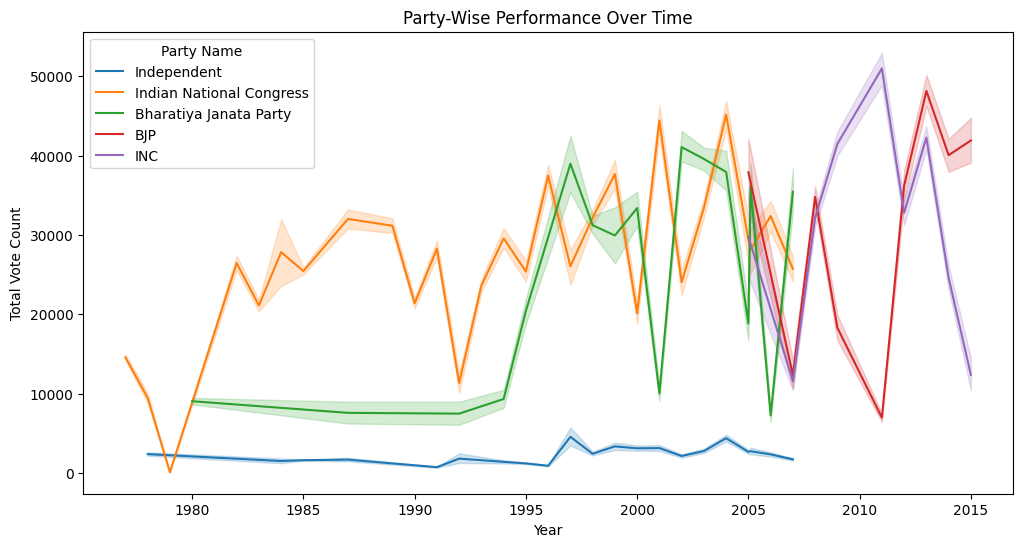

In [25]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=top_party_data, x='year', y='totvotpoll', hue='partyname')
plt.title('Party-Wise Performance Over Time')
plt.xlabel('Year')
plt.ylabel('Total Vote Count')
plt.legend(title='Party Name')
plt.show()

**Distribution of Election Types**

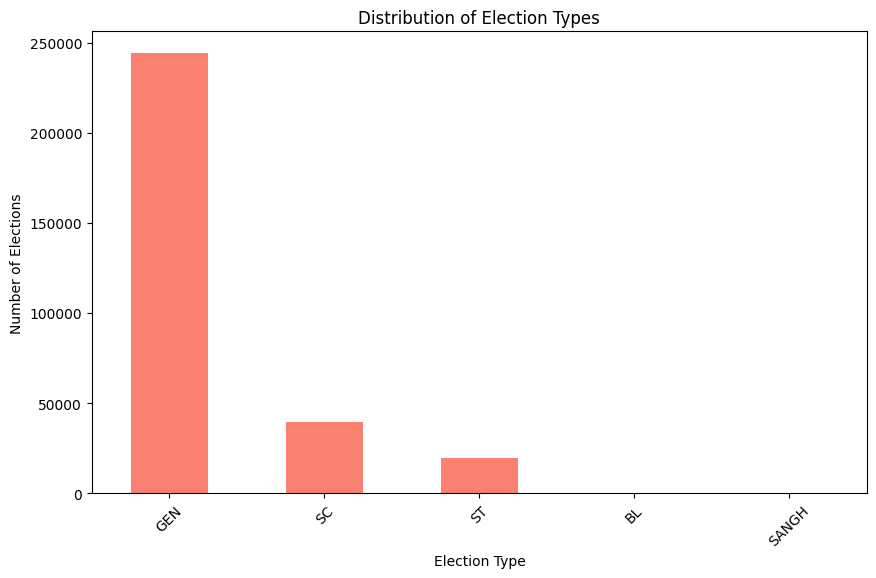

In [26]:
election_type_counts = data['ac_type'].value_counts()

plt.figure(figsize=(10, 6))
election_type_counts.plot(kind='bar', color='salmon')
plt.title('Distribution of Election Types')
plt.xlabel('Election Type')
plt.ylabel('Number of Elections')
plt.xticks(rotation=45)
plt.show()


**Finding Correlation**

<ipython-input-27-cfd47538b112>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


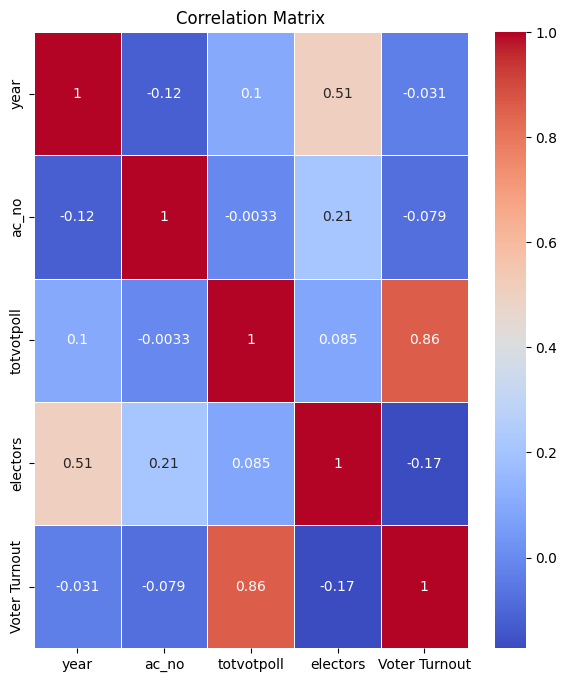

In [27]:
correlation_matrix = data.corr()
plt.figure(figsize=(7, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


**Voter turnout as a percentage**

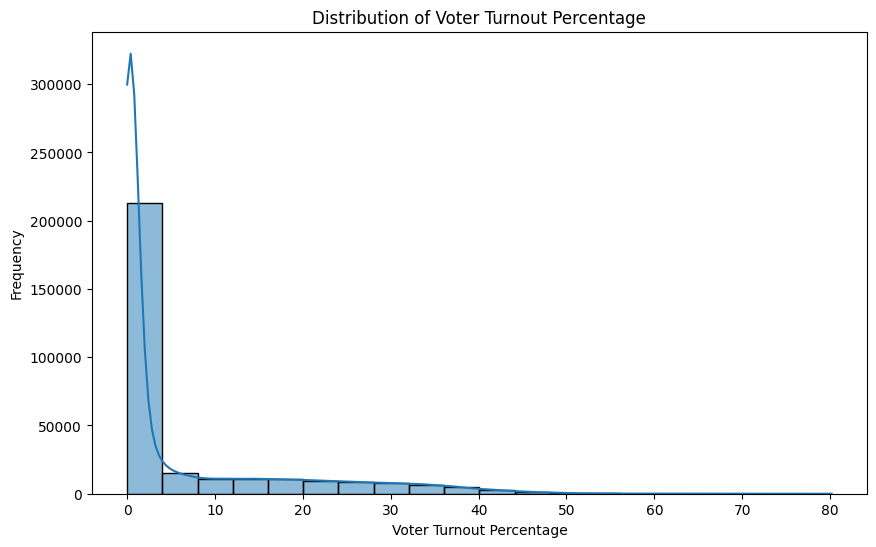

In [28]:
data['voter_turnout_percentage'] = (data['totvotpoll'] / data['electors']) * 100
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='voter_turnout_percentage', kde=True, bins=20)
plt.title('Distribution of Voter Turnout Percentage')
plt.xlabel('Voter Turnout Percentage')
plt.ylabel('Frequency')
plt.show()


**Identify independent candidates**

In [29]:
data['independent'] = data['partyname'].apply(lambda x: 'Independent' if x == 'IND' else 'Not Independent')
data[data['independent']=='Independent']

,st_name,year,ac_no,ac_name,ac_type,cand_name,cand_sex,partyname,partyabbre,totvotpoll,electors,Voter Turnout,voter_turnout_percentage,independent
14156,Andhra Pradesh,2009.0,1,Sirpur,GEN,Dubbula Venkaiah,M,IND,IND,8608.0,154673,5.565289,5.565289,Independent
14162,Andhra Pradesh,2009.0,2,Chennur,SC,Jadi Yesaiah,M,IND,IND,1953.0,150107,1.301072,1.301072,Independent
14163,Andhra Pradesh,2009.0,2,Chennur,SC,Ponnala Vinay Kumar,M,IND,IND,2103.0,150107,1.401001,1.401001,Independent
14164,Andhra Pradesh,2009.0,2,Chennur,SC,Volapu Srinivas,M,IND,IND,2646.0,150107,1.762743,1.762743,Independent
14170,Andhra Pradesh,2009.0,3,Bellampally,SC,Bolumalla Anjaiah,M,IND,IND,1030.0,139312,0.739348,0.739348,Independent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327277,West Bengal,2011.0,292,Hansan,GEN,Md. Rafiuddin (Momin),M,IND,IND,27461.0,181069,15.166042,15.166042,Independent
327280,West Bengal,2011.0,293,Nalhati,GEN,Prabhat Kumar Mondal,M,IND,IND,912.0,176438,0.516895,0.516895,Independent
327282,West Bengal,2011.0,293,Nalhati,GEN,Ajrail Md,M,IND,IND,1258.0,176438,0.712998,0.712998,Independent
327283,West Bengal,2011.0,293,Nalhati,GEN,Rudradeb Ghsoh,M,IND,IND,1516.0,176438,0.859225,0.859225,Independent


**Analyzing the number of independent candidates and their vote share**

<Figure size 1200x600 with 0 Axes>

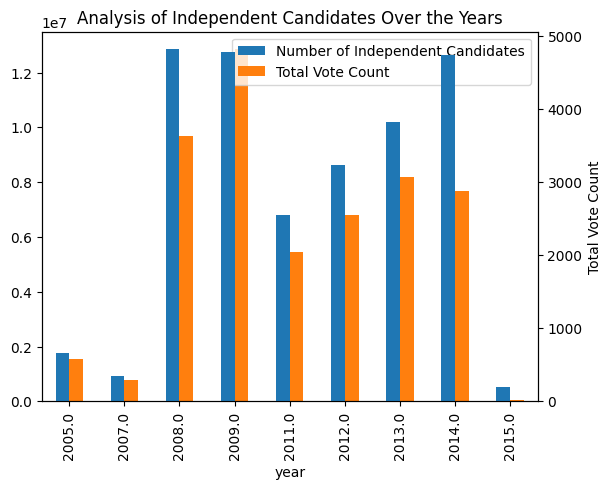

In [30]:
independent_stats = data[data['independent'] == 'Independent'].groupby('year').agg({'cand_name': 'count', 'totvotpoll': 'sum'})
independent_stats.rename(columns={'cand_name': 'Number of Independent Candidates', 'totvotpoll': 'Total Vote Count'}, inplace=True)

plt.figure(figsize=(12, 6))
independent_stats.plot(kind='bar', secondary_y='Number of Independent Candidates', mark_right=False)
plt.title('Analysis of Independent Candidates Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Vote Count')
plt.show()